# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np

from inauguralproject import HouseholdSpecializationModelClass
%reload_ext autoreload
%autoreload 2

# Question 1

**Explain how you solve the model**

In [2]:
# code for solving the model (remember documentation and comments)

model = HouseholdSpecializationModelClass()

# Exercise 1

a = [0.25, 0.50, 0.75]
s = [0.50, 1.0, 1.5]

print('The change of HF and HM depending on different alphas and sigmas', '\n')

for i in s:
    model.par.sigma = i
    for j in a:
        model.par.alpha = j
        opt = model.solve_discrete()
        HF = opt.HF
        HM = opt.HM
        HFdividedHM = opt.HF/opt.HM

        print(f"alpha={j:.2f}, sigma={i:.2f}  -->  HF={HF:.2f}, HM={HM:.2f}  -->  HF/HM={HFdividedHM:.2f}")

 
from tabulate import tabulate 

info = {
    '0.25': [3/5.5, 2/6.5, 1.5/7],
    '0.5' : [1, 1, 1],
    '0.75': [5.5/3, 6.5/2, 7/1.5]
}

print('\n', '\n', 'The illustration of the Ratio', '\n')

print(tabulate(info, headers = 'keys', tablefmt='fancy_grid', showindex=(0.5,1,1.5)))




The change of HF and HM depending on different alphas and sigmas 



c:\Users\simon\OneDrive\Dokumente\KU - Master\2.Semester\Python Intro\projects-2023-mes\projects-2023-mes-6\inauguralproject\inauguralproject.py:80: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha=0.25, sigma=0.50  -->  HF=3.00, HM=5.50  -->  HF/HM=0.55
alpha=0.50, sigma=0.50  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=0.50  -->  HF=5.50, HM=3.00  -->  HF/HM=1.83
alpha=0.25, sigma=1.00  -->  HF=2.00, HM=6.50  -->  HF/HM=0.31
alpha=0.50, sigma=1.00  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=1.00  -->  HF=6.50, HM=2.00  -->  HF/HM=3.25
alpha=0.25, sigma=1.50  -->  HF=1.50, HM=7.00  -->  HF/HM=0.21
alpha=0.50, sigma=1.50  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=1.50  -->  HF=7.00, HM=1.50  -->  HF/HM=4.67

 
 The illustration of the Ratio 

╒═════╤══════════╤═══════╤═════════╕
│     │     0.25 │   0.5 │    0.75 │
╞═════╪══════════╪═══════╪═════════╡
│ 0.5 │ 0.545455 │     1 │ 1.83333 │
├─────┼──────────┼───────┼─────────┤
│ 1   │ 0.307692 │     1 │ 3.25    │
├─────┼──────────┼───────┼─────────┤
│ 1.5 │ 0.214286 │     1 │ 4.66667 │
╘═════╧══════════╧═══════╧═════════╛


# Question 2

Explain your code and procedure

Kurpark_h: [0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
BWK_w: [-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


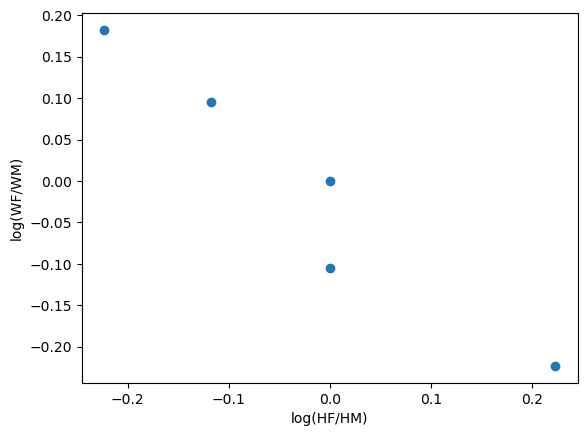

In [3]:
# code

import math
from matplotlib import pyplot as plt

model = HouseholdSpecializationModelClass()

w = [0.8, 0.9, 1, 1.1, 1.2]
Kurpark_h = []

for i in w:
    model.par.wF = i
    justus = model.solve_discrete()
    HF = justus.HF
    HM = justus.HM
    Kurpark_h.append(math.log(HF/HM))

BWK_w = []

for j in w:
    BWK_w.append(math.log(j/1))

print("Kurpark_h:", Kurpark_h)
print ("BWK_w:", BWK_w)


plt.scatter(Kurpark_h, BWK_w)
plt.ylabel("log(WF/WM)")
plt.xlabel("log(HF/HM)")
plt.show()


    

# Question 3

Explain your code and procedure

In [4]:
model = HouseholdSpecializationModelClass()

model.solve_continuously()


namespace(LM=4.454526956737588,
          HM=4.454486385710032,
          LF=4.454479205529973,
          HF=4.454493213890576)

The optimal values of LM, LF, HM, HF depending on wF
wF=0.8  -->  LM=5.889, LF=4.09, HM=2.870, HF=5.116
wF=0.9  -->  LM=5.168, LF=4.27, HM=3.749, HF=4.746
wF=1.0  -->  LM=4.454, LF=4.45, HM=4.454, HF=4.455
wF=1.1  -->  LM=3.760, LF=4.64, HM=5.022, HF=4.220
wF=1.2  -->  LM=0.000, LF=6.25, HM=7.212, HF=3.606

 
 Same results as Dataframe
 wF       LM       LF       HM       HF
0.8 5.889251 4.092584 2.869785 5.115687
0.9 5.167728 4.271034 3.749286 4.745642
1.0 4.454488 4.454480 4.454484 4.454521
1.1 3.759820 4.641951 5.021923 4.219954
1.2 0.000000 6.245691 7.211982 3.605951

 
 The visualization of the log(HF/HM) against the log(wF/wM)


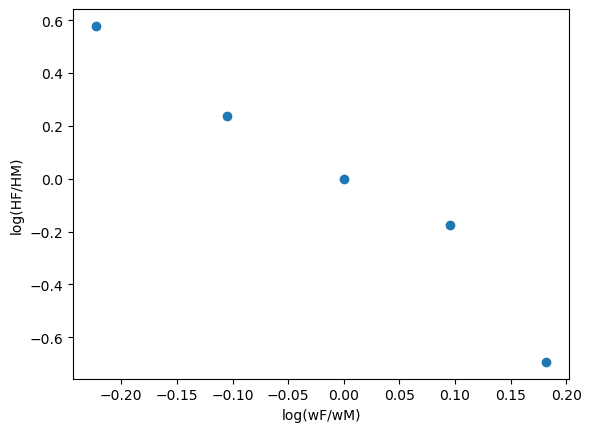

In [26]:
import pandas as pd

# save the class as 'model'
model = HouseholdSpecializationModelClass()

# A. define an empty list to store the results from the upcoming for loop
optimal_values = []

# Printing a heading
print('The optimal values of LM, LF, HM, HF depending on wF')

# B. creating a for loop to solve the model for varying wF's
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.solve_continous() # solve the model for the different values of wF
    optimal_values.append((wF, model.sol.LM, model.sol.LF, model.sol.HM, model.sol.HF)) # append the solutions to the empty list 'optimal_values'
    print(f"wF={wF:.1f}  -->  LM={model.sol.LM:.3f}, LF={model.sol.LF:.2f}, HM={model.sol.HM:.3f}, HF={model.sol.HF:.3f}") # printing the results

# C. Convert the results to a pandas DataFrame for easier manipulation
df = pd.DataFrame(optimal_values, columns=["wF", "LM", "LF", "HM", "HF"]) # create the dataFrame df with the results from above
print('\n', '\n', "Same results as Dataframe") # Printing a header
print(df.to_string(index=False)) # printing the DataFrame with excluding the index column

# D. extract colums from Pandas Data Frame and store them as new lists
a1 = df['HF'].tolist()
a2 = df['HM'].tolist()
a3 = df['wF'].tolist()

# E. Take the logs of the ratios HF/HM and wF/wM
log_a1_a2 = [math.log(a1[i] / a2[i]) for i in range(len(a1))]
log_a3 = [math.log(a3[i]) for i in range(len(a3))]

# Plot the log ratios
plt.scatter(log_a3, log_a1_a2)
plt.ylabel("log(HF/HM)")
plt.xlabel("log(wF/wM)")
print('\n', '\n', 'The visualization of the log(HF/HM) against the log(wF/wM)') # Header
plt.show()

ADD CONCISE CONLUSION.

# Question 4

In [25]:
# Solution with changing alpha and sigma manually in the .py file

model = HouseholdSpecializationModelClass()

model.par.alpha = 0.1
model.par.sigma = 0.5

w = [0.8, 0.9, 1, 1.1, 1.2]
Kurpark_h = []
placeholder_HF = []
placeholder_HM = []

for i in w:
    model.par.wF = i
    justus = model.solve_continous()
    HF = justus.HF
    HM = justus.HM
    Kurpark_h.append(math.log(HF/HM))
    placeholder_HF.append(HF)
    placeholder_HM.append(HM)

k = np.array(placeholder_HF)
l = np.array(placeholder_HM)

model.sol.HF_vec = k
model.sol.HM_vec = l


print(model.sol.HF_vec)

model.run_regression()





AttributeError: 'NoneType' object has no attribute 'HF'

In [20]:
# solution using an optimizing function for alpha and sigma

model = HouseholdSpecializationModelClass()

model.estimate()

beta0 =  0.40000000000000036 beta1 =  0.0
